In [1]:
#ANN classification with Keras

In [2]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load the dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()


In [7]:
#Create X and Y
X=pd.DataFrame(breast_cancer.data)
y=breast_cancer.target


In [8]:
#Split the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(breast_cancer.data,breast_cancer.target)


In [9]:
#Standardize the features
scaler =StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
#Define ANN
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(30,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
#Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Compile model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['acc'])

In [17]:
#Fit the model
history = model.fit(X_train,y_train,
                    batch_size=64,
                    epochs=300,
                    validation_split=0.2)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.3433 - loss: 0.7263 - val_acc: 0.4651 - val_loss: 0.6603
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.3784 - loss: 0.6878 - val_acc: 0.5698 - val_loss: 0.6187
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.4787 - loss: 0.6549 - val_acc: 0.6977 - val_loss: 0.5811
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.6013 - loss: 0.6112 - val_acc: 0.7907 - val_loss: 0.5489
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.7062 - loss: 0.5783 - val_acc: 0.8256 - val_loss: 0.5193
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7992 - loss: 0.5355 - val_acc: 0.8605 - val_loss: 0.4908
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.8188 - loss: 0.5110 - val_acc: 0.9186 - val_loss: 0.4643
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8822 - loss: 0.4848 - val_acc: 0.9186 - val_loss: 0.4404
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9087 - loss: 

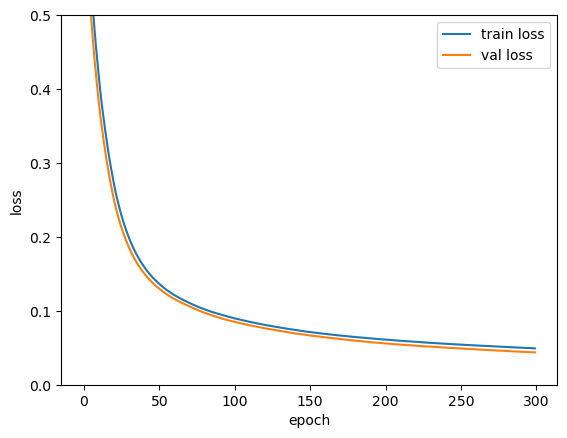

In [21]:
#Plot the learning history
plt.plot(history.history['loss'],
          label='train loss')
plt.plot(history.history['val_loss'],
          label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.ylim([0,0.5])
plt.show()


In [23]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train loss: {train_loss:.3f}")
print(f"Test loss : {test_loss:.3f}")
print(f"Train acc : {train_acc:.3f}")
print(f"Test acc  : {test_acc:.3f}")

Train loss: 0.048
Test loss : 0.104
Train acc : 0.991
Test acc  : 0.972


In [24]:
#Make prediction
y_pred = model.predict(X_test)
print(np.round(y_pred,3))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
[[0.989]
 [1.   ]
 [0.   ]
 [0.995]
 [1.   ]
 [0.255]
 [1.   ]
 [0.993]
 [0.999]
 [0.871]
 [0.999]
 [0.   ]
 [0.   ]
 [0.984]
 [0.001]
 [0.984]
 [0.   ]
 [1.   ]
 [0.989]
 [0.113]
 [0.144]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.006]
 [0.992]
 [0.974]
 [0.   ]
 [0.197]
 [0.   ]
 [0.003]
 [0.994]
 [0.   ]
 [0.997]
 [0.997]
 [0.999]
 [0.998]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.997]
 [0.   ]
 [0.988]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.982]
 [0.   ]
 [0.982]
 [0.006]
 [0.993]
 [0.997]
 [1.   ]
 [0.419]
 [0.03 ]
 [0.   ]
 [0.181]
 [0.993]
 [0.004]
 [0.979]
 [0.999]
 [0.757]
 [0.931]
 [1.   ]
 [0.   ]
 [0.958]
 [0.996]
 [0.999]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.004]
 [0.999]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.997]
 [0.389]
 [0.989]
 [0.   ]
 [0.997]
 [0.992]
 [0.007]
 [0.981]
 [0.996]
 [0.981]
 [0.002]
 [0.115]
 [0.974]
 [0.99 ]
 [0.993]
 [0.001]
 [0.   ]
 [0.999]
 [0.992]
 [1.   ]
 [0.998]
 [0.974]
 [0.995]
 [0.   ]
 [0.975]
 [0.648]
 [0.   ]
 [0.993]
 [0.   ]
 [0.997]
 [0.995